In [1]:
import sys
print(sys.version)

3.8.3 | packaged by conda-forge | (default, Jun  1 2020, 17:21:09) 
[Clang 9.0.1 ]


In [2]:
"""
Created on September 8 2020
@author: Neven Caplar
@contact: ncaplar@princeton.edu

These comments are theoretically the only ones you need to read to run the notebook

1. Specify the directory in which you want to run the analysis below (PSF_DIRECTORY)
2. Name and place the data in DATA_FOLDER. The data is avaliable at https://github.com/nevencaplar/PFS_Work_In_Progress/tree/master/CutsForTigerMay2
3. TESTING_FOLDER will be filled during the run with images from the analysis analysis

4. (OPTIONAL)Next cell contains some extensions that I use that make life much easier when using jupyter notebook 
    Without them this notebook becomes reallllly huge and hard to deal with
    These can be downloaded from https://github.com/ipython-contrib/jupyter_contrib_nbextensions

"""
############################################################
# name your directory where you want to have files!
PSF_DIRECTORY='/Users/nevencaplar/Documents/PFS/'
# place cutouts in this folder - name as you wish
DATA_FOLDER=PSF_DIRECTORY+'TigerAnalysis/CutsForTigerMay2/'
############################################################
    

TESTING_FOLDER=PSF_DIRECTORY+'Testing/'
TESTING_PUPIL_IMAGES_FOLDER=TESTING_FOLDER+'Pupil_Images/'
TESTING_WAVEFRONT_IMAGES_FOLDER=TESTING_FOLDER+'Wavefront_Images/'
TESTING_FINAL_IMAGES_FOLDER=TESTING_FOLDER+'Final_Images/'
import os

for i in [PSF_DIRECTORY,DATA_FOLDER,TESTING_PUPIL_IMAGES_FOLDER,TESTING_WAVEFRONT_IMAGES_FOLDER,TESTING_FINAL_IMAGES_FOLDER]:
    if not os.path.exists(i):
        os.makedirs(i)

In [3]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [4]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [21]:
%load_ext autoreload
%autoreload 2

#import Zernike_Module
#from Zernike_Module import LNP_PFS,LN_PFS_single,create_parInit,downsample_manual_function,Zernike_Analysis,PFSPupilFactory,custom_fftconvolve,stepK,maxK,sky_scale,sky_size,create_x,remove_pupil_parameters_from_all_parameters

import Zernike_Module
import Zernike_Analysis_Module
from Zernike_Module import *
from Residual_1D_module import * 
from Zernike_Analysis_Module import *

print(Zernike_Module.__version__)
print(Zernike_Analysis_Module.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.33b
0.26b


In [22]:
import galsim
import numpy as np
np.set_printoptions(suppress=True)
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import io
import math
import pickle
import glob
import time

#tqdm is not necesarry, it is the monitor evaluation of the 'for' loops
from tqdm import tqdm

# lsst stack
#import lsst.afw
#from lsst.afw.cameraGeom import PupilFactory
#from lsst.afw.geom import Angle, degrees
#from lsst.afw import geom
#from lsst.afw.geom import Point2D

# astropy
import astropy
import astropy.convolution
from astropy.convolution import Gaussian2DKernel

# scipy and skimage
#from scipy.ndimage import gaussian_filter
import scipy.misc
import skimage.transform

#lmfit
import lmfit

#matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 18})
%config InlineBackend.rc = {}
%matplotlib inline
%config IPython.matplotlib.backend = "retina"

from shutil import copy
from scipy.optimize import curve_fit

from astropy.io import fits

def lin_fit_1D(x, a, b):
    return a * x + b

def lin_fit_1DConstant(x, b):
    return  np.full(len(x),b)

def lin_fit_2D(x,y, a, b,c):
    return a * x + b*y+c



print(np.__version__)
print(skimage.__version__)
print(scipy.__version__)
print(pd.__version__)

1.18.5
0.17.2
1.5.0
1.0.5


# Test run update 

In [8]:
#date='Jul2020'
date='Aug1220'
obs=21448
#obs_multi=[21352, 21358, 21364, 21436, 21442, 21448 ]
obs_int=int(obs)
single_number='9'
image_index=int(single_number)
eps=6
arc='HgAr'
dataset=4

list_of_defocuses_input_short=['m4','p4']
list_of_defocuses_input_long=['m4','m35','m3','m05','0','p05','p3','p35','p4']

In [9]:
#single_analysis=Zernike_Analysis(date=date,obs='m4',single_number=single_number,eps=eps,arc=arc,dataset=dataset,multi_var=True,\
#                                 list_of_defocuses=['m4','m35','m3','m05','0','p05','p3','p35','p4'])

single_analysis=Zernike_Analysis(date=date,obs='m3',single_number=single_number,eps=eps,arc=arc,dataset=dataset,multi_var=True,\
                                 list_of_defocuses=list_of_defocuses_input_long)
double_sources,double_sources_positions_ratios=single_analysis.return_double_sources()
list_of_sci_images,list_of_var_images,list_of_mask_images=single_analysis.return_lists_of_images()
index_of_single_image=single_analysis.return_index_of_single_image_in_list_of_images()
columns,columns22,columns22_analysis=single_analysis.return_columns()

chain0_swarm_1,likechain0_swarm_1=single_analysis.create_chains_swarm_1()
#chain0_Emcee3,likechain0_Emcee3=single_analysis.create_chains_Emcee_2()
len_of_chains=single_analysis.len_of_chains()

minchain_parametrization,like_min=single_analysis.create_likelihood()

labelInput: m3
self.single_number: 9
list_of_defocuses: ['m4', 'm35', 'm3', 'm05', '0', 'p05', 'p3', 'p35', 'p4']
list_of_obs: [21352, 21358, 21364, 21394, 21400, 21406, 21436, 21442, 21448]
<_io.BufferedReader name='/Users/nevencaplar/Documents/PFS/ReducedData/Data_Aug_14/Dataframes/finalHgAr_Feb2020'>
analyzing label: 21364
(180, 120, 129)
(180, 120, 129)
minimal likelihood is: 38073.15315907753
minimal chi2 reduced is (makes no sense for multi_var): 35.92816508165941


In [18]:
model_multi=LN_PFS_multi_same_spot(list_of_sci_images,list_of_var_images,list_of_mask_images=list_of_mask_images,dithering=1,save=0,zmax=56,verbosity=1,\
                      double_sources=False,double_sources_positions_ratios=double_sources_positions_ratios,npix=1536,test_run=True)   
list_of_minchain=model_multi.create_list_of_allparameters(minchain_parametrization,list_of_defocuses=list_of_defocuses_input_long,zmax=56)
#list_of_minchain=model_multi.create_list_of_allparameters(minchain_parametrization,list_of_defocuses=['m4','p4'],zmax=56)

res_multi=model_multi(list_of_minchain,return_Images=True)


mean_res_of_multi_same_spot,list_of_single_res,list_of_single_model_image,\
                list_of_single_allparameters,list_of_single_chi_results=res_multi

#model = LN_PFS_single(list_of_sci_images[index_of_single_image],list_of_var_images[index_of_single_image],mask_image=list_of_mask_images[index_of_single_image],dithering=1,save=1,zmax=22,verbosity=1,\
#                      double_sources=None,double_sources_positions_ratios=double_sources_positions_ratios,fit_for_flux=True,npix=1536)  

#res_with_Image=model(list_of_minchain[index_of_single_image],return_Image=True)

################################
analyzing image 1 out of 9
 
Science image shape is: (60, 60)
Top left pixel value of the science image is: 71.566414
Variance image shape is: (60, 60)
Top left pixel value of the variance image is: 202.46283
Mask image shape is: (60, 60)
Sum of mask image is: 0.0
Dithering value is: 1

supplied extra Zernike parameters (beyond zmax): None
np.__version__1.18.5
skimage.__version__0.17.2
scipy.__version__1.5.0
Zernike_Module.__version__0.33b
 
Initializing ZernikeFitter_PFS
Verbosity parameter is: 1
Highest Zernike polynomial is (zmax): 56

Entering lnlike_Neven
allparameters [   31.04336999    -2.51664212    -1.36884475    -0.05430476
     0.17849002    -0.2256084     -0.30819267     0.64797796
    -0.08776939     0.11516242    -0.05574323     0.01895514
    -0.10590914     0.15546999     0.05667022    -0.0293529
    -0.05983741    -0.00520457     0.12546344     0.70363308
     0.09965561    -0.21361721     0.20014457     0.05789034
     0.08448487     0


Entering lnlike_Neven
allparameters [   -3.65760699    -0.71575452    -0.19606724    -0.2974266
     0.43455631    -0.31484495    -0.31370676     0.19491563
    -0.08904948     0.13611831    -0.02333043     0.00174537
     0.00675832     0.01473352     0.03218166    -0.0103303
    -0.00919031     0.00456461     0.01573795     0.70363308
     0.09965561    -0.21361721     0.20014457     0.05789034
     0.08448487     0.00001517     0.00001518     0.97679294
     0.94839032     0.01162481    -0.01240252     0.91188955
     0.03119715     0.54748145     1.02150912     0.62717054
 35875.45238193     2.54597481     0.00476838     0.39230117
     1.84287945     1.            -0.01914757    -0.01142405
    -0.00398792     0.0022095      0.00171729     0.00226092
    -0.00870623     0.00989177     0.00017611     0.01879003
     0.0033992     -0.0081148      0.00304521     0.00980736
    -0.00084012     0.00313436     0.00740378     0.00320157
     0.00305917    -0.00831971     0.00327078    -

In [17]:
(Zernike_Module.__version__)[:4]

'0.33'

In [19]:
list_of_finalinput_parameters

NameError: name 'list_of_finalinput_parameters' is not defined

# Hexapod experiment  - PIPE2D 584 - September data

In [25]:
Ar_positions_x_1=[474,733,1714,2614,3005]
Ar_positions_y_1=[3420,3406,3387,3388,3396]
Ar_positions_x_2=[477,731,1714,2614,3005]
Ar_positions_y_2=[1679,1668,1652,1654,1660]
Ar_positions_x_3=[477,731,1714,2614,3005]
Ar_positions_y_3=[2589,2576,2559,2561,2567]


In [85]:

list_of_centroids_array=[]
list_of_x_y_z=[]
for i in range(24507,24879+1):
    try:
        if i >=24621:
            hdul=fits.open('/Volumes/Saturn_USA/PFS/Subaru/raw/pfs/2020-09-05/sps/PFSA0'+str(i)+'12.fits')
        else:
            hdul=fits.open('/Volumes/Saturn_USA/PFS/Subaru/raw/pfs/2020-09-04/sps/PFSA0'+str(i)+'12.fits')


        x_y_z=[np.round(hdul[0].header['W_ENFCAX'],4),\
               np.round(hdul[0].header['W_ENFCAY'],4),\
               np.round(hdul[0].header['W_ENFCAZ'],4)]

        scidata=hdul[1].data
        print(i)
        print(x_y_z)

        size=30
        list_of_centroids_same_image=[]
        for Ar_positions_index in [0,1,2]:
            Ar_positions_y=[Ar_positions_y_1,Ar_positions_y_2,Ar_positions_y_3][Ar_positions_index]
            Ar_positions_x=[Ar_positions_x_1,Ar_positions_x_2,Ar_positions_x_3][Ar_positions_index]
            scidata_0=scidata[Ar_positions_y[0]-size:Ar_positions_y[0]+size,Ar_positions_x[0]-size:Ar_positions_x[0]+size]
            scidata_1=np.flip(scidata[Ar_positions_y[1]-size:Ar_positions_y[1]+size,Ar_positions_x[1]-size:Ar_positions_x[1]+size],axis=1)
            scidata_2=np.flip(scidata[Ar_positions_y[2]-size:Ar_positions_y[2]+size,Ar_positions_x[2]-size:Ar_positions_x[2]+size],axis=1)
            scidata_3=scidata[Ar_positions_y[3]-size:Ar_positions_y[3]+size,Ar_positions_x[3]-size:Ar_positions_x[3]+size]
            scidata_4=np.flip(scidata[Ar_positions_y[4]-size:Ar_positions_y[4]+size,Ar_positions_x[4]-size:Ar_positions_x[4]+size],axis=1)

            scidata_0=scidata_0-np.median(scidata_0)
            scidata_1=scidata_1-np.median(scidata_1)
            scidata_2=scidata_2-np.median(scidata_2)
            scidata_3=scidata_3-np.median(scidata_3)
            scidata_4=scidata_4-np.median(scidata_4)

            centroids_array=np.array([find_centroid_of_flux(scidata_0),find_centroid_of_flux(scidata_1),find_centroid_of_flux(scidata_2),find_centroid_of_flux(scidata_3),find_centroid_of_flux(scidata_4)])
            list_of_centroids_same_image.append(centroids_array)
        print(np.concatenate(list_of_centroids_same_image))
        list_of_centroids_array.append(np.concatenate(list_of_centroids_same_image))
        list_of_x_y_z.append(x_y_z)
    except:
        pass



24507
[-0.0, -0.0, -0.0]
[[29.73630195 29.81984441]
 [29.22605537 29.10061903]
 [30.07555106 29.26743202]
 [29.84809446 30.11434575]
 [29.37171936 29.20885774]
 [30.19692977 29.94365757]
 [29.3465762  29.26423821]
 [29.62798995 29.99676642]
 [29.29768297 29.50696258]
 [28.07292292 29.49449085]
 [30.05431845 29.21136254]
 [29.32484886 29.19227356]
 [29.93850678 29.36720474]
 [29.28243612 29.0117504 ]
 [28.19012247 29.4526344 ]]
24508
[-0.0, -0.0, -0.0]
[[29.72832563 29.79975331]
 [27.96587331 30.25912921]
 [30.06648857 29.2704273 ]
 [29.85083524 30.11292533]
 [29.36843569 29.1962868 ]
 [30.21210227 29.95818324]
 [29.3495345  29.29203064]
 [29.6164022  29.99374558]
 [29.30288654 29.50739441]
 [28.08764833 29.48300971]
 [29.57419486 30.33504742]
 [29.34404042 29.1279854 ]
 [29.95931225 29.34785018]
 [29.29568649 28.98172769]
 [28.18027654 29.47037672]]
24509
[0.0, -0.0, -0.0]
[[29.72613395 29.8128236 ]
 [29.24837884 29.11233896]
 [30.07587843 29.26308774]
 [29.79623057 30.12532246]
 [29.3

24528
[0.0, 0.05, 0.01]
[[29.99635491 31.33839421]
 [29.53877705 30.62687298]
 [30.36213964 30.81456185]
 [30.0783107  31.64481557]
 [29.66551972 30.75873292]
 [30.50299896 31.4283486 ]
 [29.63201658 30.77609184]
 [29.9325476  31.4852197 ]
 [29.58109757 31.00839321]
 [28.35845491 30.9998229 ]
 [30.35237228 30.68041697]
 [29.63101832 30.65609374]
 [30.25553225 30.8630601 ]
 [30.83740522 29.69282745]
 [28.4604175  30.97104137]]
24529
[0.0, 0.05, 0.0]
[[29.72453804 31.34281103]
 [29.24346817 30.65009312]
 [30.09128326 30.81213268]
 [29.77919738 31.64904919]
 [29.38786773 30.71698901]
 [30.21139239 31.4545288 ]
 [29.33784866 30.79432488]
 [29.64331153 31.48062592]
 [29.29284076 31.00846784]
 [28.06844566 31.00119566]
 [30.02862559 30.71667223]
 [29.36256758 30.69381992]
 [29.97418569 30.89182566]
 [29.29974718 30.49449302]
 [28.15783607 30.94508301]]
24530
[0.0, 0.05, 0.0]
[[29.72217438 31.35038647]
 [29.25169302 30.65633189]
 [30.07636926 30.80064999]
 [29.77180372 31.63933451]
 [28.94435

24548
[-0.0, 0.04, 0.05]
[[31.18686975 30.99828193]
 [30.68636902 30.29620239]
 [31.52937752 30.5145212 ]
 [31.22812395 31.37640543]
 [30.82383125 30.4675532 ]
 [31.66404739 31.10068429]
 [30.76844125 30.42328489]
 [31.08186572 31.20128852]
 [30.73289428 30.72078161]
 [29.54321953 30.72291475]
 [31.51323096 30.36243771]
 [30.76912784 30.35124538]
 [31.39025608 30.58087474]
 [30.74691178 30.22712933]
 [29.62834918 30.6548272 ]]
24549
[-0.0, 0.04, 0.05]
[[31.17896229 30.98413596]
 [30.69430666 30.31056244]
 [31.52129115 30.5062308 ]
 [31.20155173 31.38050803]
 [30.81810737 30.47134726]
 [31.68082125 31.10432468]
 [30.81147942 30.4677348 ]
 [31.05717548 31.21547502]
 [30.22507539 30.27102064]
 [29.52426035 30.70782776]
 [31.50254557 30.35553647]
 [30.75186794 30.30168035]
 [31.39340122 30.5772618 ]
 [30.74584156 30.23098925]
 [29.62113043 30.66745926]]
24550
[-0.0, 0.04, 0.04]
[[30.88919493 30.98658715]
 [30.39212865 30.30668   ]
 [31.23734395 30.52403694]
 [30.93738204 31.37981989]
 [30.

24568
[-0.0, 0.04, -0.02]
[[29.14609228 31.07737323]
 [28.68498703 30.36178248]
 [29.50822052 30.5001031 ]
 [29.20543653 31.34829931]
 [28.80472236 30.41203727]
 [29.06507543 31.18640967]
 [28.7804678  30.49550829]
 [29.0263651  31.19379679]
 [28.72221775 30.7025379 ]
 [27.50518239 30.66666762]
 [29.4514412  30.42289848]
 [28.75543919 30.38002899]
 [29.36278948 30.56921752]
 [28.71961978 30.19628015]
 [27.57951009 30.64603686]]
24569
[-0.0, 0.04, -0.02]
[[29.14963158 31.0609982 ]
 [28.64971854 30.34709237]
 [29.51281134 30.49954364]
 [29.19843971 31.34411031]
 [28.78981212 30.40054567]
 [29.65197106 31.17998516]
 [28.76143266 30.48819425]
 [29.03863872 31.20608532]
 [28.73101972 30.67306912]
 [27.50468097 30.66926672]
 [29.46712097 30.41324227]
 [28.72919037 30.35121147]
 [29.36072692 30.55862223]
 [28.7282738  30.17740037]
 [27.58000152 30.61475223]]
24570
[-0.0, 0.04, -0.02]
[[29.1551344  31.0607841 ]
 [28.67730081 30.3380636 ]
 [29.49846929 30.49522902]
 [29.20021667 31.35254451]
 [

24587
[-0.0, 0.03, 0.03]
[[30.6034692  30.71540027]
 [30.13344965 30.0294741 ]
 [30.95751848 30.20912794]
 [30.64384444 31.08036639]
 [30.26169611 30.15841545]
 [31.08564613 30.85069956]
 [30.23759012 30.17833778]
 [30.49432893 30.92965689]
 [30.18837095 30.44504253]
 [28.9669539  30.44639068]
 [30.95101842 30.09618693]
 [30.2280433  30.09914778]
 [30.82633944 30.29647601]
 [29.65775329 30.22106693]
 [29.05497071 30.41353793]]
24588
[-0.0, 0.03, 0.03]
[[30.60904658 30.71295452]
 [30.11421916 30.03270264]
 [30.96522413 30.20818518]
 [30.65676713 31.06802389]
 [30.26262418 30.15026786]
 [31.0823564  30.84217592]
 [30.22510838 30.18975187]
 [30.49852849 30.8959724 ]
 [30.18128285 30.44393813]
 [28.97144924 30.46203344]
 [30.94380564 30.08165605]
 [30.22016791 30.02520364]
 [31.81797094 28.72854279]
 [30.16846326 29.93195127]
 [29.05226594 30.41100896]]
24589
[-0.0, 0.03, 0.02]
[[30.32752041 30.72194677]
 [29.84444248 30.0359399 ]
 [30.28353459 31.30093428]
 [30.80003776 30.29162016]
 [29.

24606
[-0.0001, 0.03, -0.03]
[[28.88123228 30.77963592]
 [28.40044775 30.06179046]
 [28.77687883 30.63848211]
 [28.92511502 31.02835994]
 [28.52331485 30.09439353]
 [29.35435489 30.88756171]
 [28.49889125 30.2224156 ]
 [30.4179418  29.90052278]
 [28.44296759 30.39329002]
 [27.23645245 30.36939444]
 [29.18780077 30.158841  ]
 [28.45532427 30.08119758]
 [29.10244341 30.26904196]
 [28.46218372 29.85034395]
 [27.2898905  30.33848746]]
24607
[-0.0, 0.03, -0.04]
[[28.59069465 30.80510119]
 [28.09837699 30.07485296]
 [28.94905507 30.20037751]
 [28.63416137 31.02089261]
 [28.23858889 30.09192413]
 [29.06031796 30.90860114]
 [28.21420999 30.22637363]
 [28.47752035 30.88741468]
 [28.1355257  30.38739137]
 [26.92845791 30.37624776]
 [28.87760124 30.15347654]
 [28.1835162  30.11460001]
 [28.78799152 30.28361477]
 [28.13960413 29.87109834]
 [27.01094524 30.33101973]]
24608
[-0.0001, 0.03, -0.04]
[[28.57864772 30.76919933]
 [28.11041985 30.07738291]
 [28.93234898 30.20628882]
 [28.63177889 31.027610

24626
[-0.0001, 0.02, 0.01]
[[30.03192777 30.41034321]
 [29.54711091 29.74033429]
 [30.38216778 29.8924352 ]
 [30.08013483 30.75542719]
 [29.67250712 29.82880044]
 [30.53972596 30.53768444]
 [29.67513407 29.89382369]
 [29.92296586 30.62836315]
 [29.7810986  29.04944894]
 [28.36838061 30.13028399]
 [30.34250776 29.78707692]
 [29.64205381 29.76019767]
 [30.25124671 29.96974749]
 [29.6225244  29.63010754]
 [28.48327671 30.02328133]]
24627
[-0.0001, 0.02, 0.01]
[[30.03886837 30.44228636]
 [29.53818185 29.72995515]
 [30.38772995 29.90183042]
 [30.07589057 30.76760932]
 [29.69539684 29.85513565]
 [30.51975955 30.5613214 ]
 [29.65759133 29.89075829]
 [29.90430664 30.611011  ]
 [29.61935994 30.11590897]
 [28.39582754 30.09962142]
 [30.34595692 29.78157813]
 [29.64394565 29.75385628]
 [30.2512558  29.96339935]
 [29.60595609 29.61543481]
 [28.4792001  30.10590821]]
24628
[-0.0001, 0.02, -0.0]
[[29.75865947 30.44670607]
 [29.26445389 29.74029973]
 [30.10072967 29.89742209]
 [29.79983952 30.748206

24645
[-0.0001, 0.02, -0.05]
[[28.3066429  30.48557185]
 [27.81292359 29.79222662]
 [28.6451759  29.89044627]
 [28.35298421 30.71587506]
 [27.94092446 29.78346384]
 [28.80258244 30.60091633]
 [27.92326465 29.93545989]
 [28.21252107 30.6047596 ]
 [27.86374598 30.08838663]
 [26.65040099 30.06760007]
 [28.59182991 29.84160322]
 [27.87377675 29.77714764]
 [28.50279026 30.02286329]
 [27.86487917 29.59669075]
 [26.75474736 30.01259522]]
24646
[-0.0001, 0.01, 0.05]
[[31.21395322 30.08000692]
 [30.69332905 29.40577688]
 [31.53932092 29.62341216]
 [31.2360298  30.47183002]
 [30.83343776 29.57632443]
 [31.69190387 30.21788277]
 [30.80404641 29.55905952]
 [31.07213379 30.30255503]
 [30.75102824 29.84703424]
 [29.54609906 29.87183532]
 [31.56124952 29.44923981]
 [30.79843121 29.42629518]
 [31.41675692 29.70320676]
 [30.758978   29.34244298]
 [29.65258426 29.8422313 ]]
24647
[-0.0001, 0.01, 0.05]
[[31.18481136 30.06558054]
 [30.70400109 29.38525487]
 [31.53862812 29.60566999]
 [31.22645721 30.47304

24664
[-0.0001, 0.01, -0.01]
[[29.47060708 30.13419488]
 [28.95077324 29.44947371]
 [29.8177981  29.58441262]
 [29.51164401 30.44185419]
 [29.09276579 29.50724253]
 [29.9301287  30.28197416]
 [29.49965461 27.44812444]
 [29.35000174 30.31597779]
 [29.03205668 29.82794058]
 [27.80489437 29.80220119]
 [29.79268724 29.5181016 ]
 [29.07257304 29.45440781]
 [29.67399413 29.66477328]
 [29.02353708 29.3021015 ]
 [27.88508632 29.75006289]]
24665
[-0.0001, 0.01, -0.01]
[[29.45939282 30.1452718 ]
 [31.69727708 31.52637147]
 [29.80355827 29.60237676]
 [29.4960499  30.42961444]
 [29.09965728 29.52731023]
 [29.94917411 30.27295885]
 [29.07403702 29.62606947]
 [29.34500727 30.31629948]
 [29.02245768 29.81748424]
 [27.78257111 29.82514563]
 [29.78128155 29.49098192]
 [29.09201155 29.48958686]
 [29.645889   29.69892081]
 [29.01134691 29.28507596]
 [27.8976351  29.75696198]]
24666
[-0.0001, 0.01, -0.01]
[[29.45946837 30.13600364]
 [28.96457919 29.43114035]
 [30.04431262 30.33291518]
 [29.50115049 30.438

24683
[-0.0001, 0.0, 0.04]
[[30.92865637 29.78416943]
 [30.41836647 29.09955363]
 [31.25348551 29.30928637]
 [30.95314469 30.16768924]
 [30.55414428 29.25714721]
 [31.41494    29.95197686]
 [30.55643628 29.32096032]
 [30.78741986 29.84044409]
 [30.49061765 29.54647448]
 [29.27193991 29.52152088]
 [31.23294824 29.16166169]
 [30.50374674 29.16009949]
 [31.11974667 29.4168049 ]
 [30.49368829 29.03870498]
 [29.35235926 29.52811105]]
24684
[-0.0001, 0.0, 0.04]
[[30.94282958 29.77358087]
 [28.29127271 27.29110176]
 [31.24256276 29.29084586]
 [30.9444012  30.16830785]
 [29.75265405 30.62345477]
 [31.38434882 29.92609962]
 [30.52796794 29.26984593]
 [30.79930812 30.0238789 ]
 [30.48063237 29.53444213]
 [29.22706536 29.56768373]
 [31.22916794 29.18351699]
 [30.492387   29.12593557]
 [31.12903991 29.34812916]
 [30.48493268 29.03858227]
 [29.33649991 29.48966541]]
24685
[-0.0001, 0.0, 0.03]
[[30.6239303  29.7976888 ]
 [30.13412222 29.09898121]
 [30.95594857 29.31892434]
 [30.64983818 30.16864847]

24702
[-0.0002, -0.0, -0.02]
[[29.16920818 29.86578166]
 [28.71806374 29.16258878]
 [29.51714921 29.3082361 ]
 [29.21151797 30.13872086]
 [28.79788349 29.20581426]
 [29.66975563 29.96672392]
 [28.80665612 29.33385377]
 [29.03715207 30.01513296]
 [28.7392836  29.51023377]
 [27.51839279 29.51422729]
 [29.4659836  29.21710019]
 [28.77041002 29.15280698]
 [29.3790048  29.40477559]
 [28.72676062 29.00382277]
 [27.58534019 29.43803255]]
24703
[-0.0002, -0.0, -0.03]
[[28.89097937 29.85155227]
 [28.39554374 29.1506707 ]
 [29.7061506  29.67810475]
 [28.9223108  30.1243589 ]
 [28.50742883 29.19678603]
 [29.35793337 29.97090307]
 [28.47159927 29.31937408]
 [28.78265952 30.00566426]
 [28.45383649 29.50482543]
 [27.22560403 29.50442216]
 [29.20054824 29.23624029]
 [28.48261209 29.19031777]
 [29.08595318 29.37937739]
 [28.45813005 28.99155992]
 [27.32252465 29.424694  ]]
24704
[-0.0002, -0.0, -0.03]
[[28.88570664 29.85427776]
 [28.40544517 29.13503255]
 [29.22395348 29.28767276]
 [28.9215629  30.118

24721
[-0.0002, -0.01, 0.02]
[[30.32757726 29.50162966]
 [29.84691131 28.81413866]
 [30.67230751 28.99960916]
 [30.37381922 29.86586608]
 [29.97035385 28.93772314]
 [30.82153952 29.65316371]
 [29.92028298 28.99096373]
 [30.21783022 29.74166176]
 [29.90787153 29.25105788]
 [28.67453791 29.24728862]
 [30.64749093 28.91597153]
 [29.92521606 28.84411487]
 [30.55140191 29.10415986]
 [29.90257045 28.72184317]
 [28.76679443 29.177511  ]]
24722
[-0.0002, -0.01, 0.02]
[[30.3480653  29.49824283]
 [29.83432242 28.80423949]
 [30.6835903  28.99908995]
 [30.38897716 29.8670202 ]
 [29.95481385 28.92591664]
 [30.83416727 29.66705978]
 [29.94992238 29.02208637]
 [30.84502897 29.98800534]
 [29.89536962 29.24240382]
 [28.6843984  29.24056959]
 [30.65345105 28.89013703]
 [29.91798773 28.83910334]
 [30.55656838 29.0995638 ]
 [29.89112423 28.74616094]
 [28.79735241 29.18637557]]
24723
[-0.0002, -0.01, 0.02]
[[30.33956486 29.50193407]
 [29.82663686 28.81826926]
 [30.66521973 29.00862299]
 [30.3792865  29.860

24740
[-0.0002, -0.01, -0.04]
[[28.5965488  29.56044151]
 [28.10748834 28.84282516]
 [28.94325872 28.985013  ]
 [28.63850764 29.80807658]
 [28.2311321  28.86914098]
 [29.04832245 29.70088115]
 [28.19800797 29.04019759]
 [28.47097766 29.73872345]
 [28.14195547 29.20948069]
 [26.91385686 29.18300229]
 [28.9146262  28.93715702]
 [28.17221634 28.85317717]
 [28.78379308 29.0449965 ]
 [28.14894335 28.6566545 ]
 [27.01482464 29.12335089]]
24741
[-0.0002, -0.01, -0.04]
[[28.602384   29.5542966 ]
 [28.14096751 28.85519536]
 [28.94794149 28.97321203]
 [28.81459731 30.09708693]
 [28.21901982 28.87054854]
 [29.08345902 29.70053762]
 [28.21807753 29.01683435]
 [28.50492777 29.70796148]
 [28.15725284 29.19202448]
 [26.92356998 29.17308561]
 [28.88665911 28.93324978]
 [28.18516463 28.89376491]
 [28.79300693 29.04931621]
 [28.15384744 28.6600708 ]
 [27.03113623 29.10990232]]
24742
[-0.0002, -0.01, -0.05]
[[28.29889117 29.57431241]
 [27.80395179 28.84546907]
 [28.64088256 28.97675127]
 [28.3244593  29.

24759
[-0.0003, -0.02, 0.01]
[[30.06756707 29.21238515]
 [29.56853695 28.515229  ]
 [30.39310926 28.68410352]
 [30.08410934 29.54847054]
 [29.6794964  28.61471692]
 [30.54592537 29.36726314]
 [29.67774991 28.72875186]
 [29.92295126 29.42714995]
 [29.60492209 28.94494268]
 [28.4217785  28.94971902]
 [30.37136242 28.5911533 ]
 [29.65074068 28.5765458 ]
 [30.24524251 28.76138356]
 [29.59155295 28.42143049]
 [28.49106514 28.89337148]]
24760
[-0.0003, -0.02, -0.0]
[[29.76235084 29.21451959]
 [29.28515267 28.49693872]
 [30.09703098 28.68407798]
 [29.81803754 29.52506325]
 [29.39646708 28.59122488]
 [30.25833458 29.36031965]
 [29.3810565  28.71671664]
 [29.62540297 29.43701231]
 [29.33351891 28.93479523]
 [28.12680815 28.93683769]
 [30.09241764 28.63695636]
 [29.35898117 28.59401728]
 [29.97539702 28.76946457]
 [29.32917336 28.40085575]
 [28.17744451 28.83889376]]
24761
[-0.0003, -0.02, 0.0]
[[29.74687076 29.23002261]
 [29.27893673 28.50726152]
 [30.08866793 28.67858078]
 [29.78396762 29.5473

24778
[-0.0003, -0.03, 0.05]
[[31.2255597  28.84868949]
 [30.72295365 28.1622646 ]
 [31.54733003 28.38627247]
 [31.23179803 29.26478668]
 [30.85429496 28.35681419]
 [31.66922133 29.0391699 ]
 [29.65848949 27.71704972]
 [31.09026941 29.14701071]
 [30.77788076 28.65976649]
 [29.54756339 28.6921183 ]
 [31.54499021 28.26292972]
 [30.81235087 28.26184354]
 [31.43503563 28.51076971]
 [30.77282281 28.14605098]
 [29.65052251 28.5692222 ]]
24779
[-0.0003, -0.03, 0.05]
[[31.21235363 28.84088092]
 [30.71694256 28.15940548]
 [31.54505985 28.38543731]
 [31.24542045 29.26186572]
 [30.84087891 28.34550174]
 [31.68076556 29.02805426]
 [30.81523048 28.40039523]
 [31.09333462 29.15822839]
 [30.77511985 28.67680498]
 [29.54739346 28.66506248]
 [31.57399308 28.28356387]
 [30.79107485 28.2269093 ]
 [31.4309108  28.50340177]
 [30.77210233 28.1356352 ]
 [29.63844122 28.60301778]]
24780
[-0.0003, -0.03, 0.05]
[[31.21496039 28.85741775]
 [30.71018513 28.17916662]
 [31.53631445 28.41339219]
 [31.23078781 29.261

24797
[-0.0003, -0.03, -0.01]
[[29.47441895 28.90733716]
 [29.00208807 28.21289919]
 [29.80446963 28.36243827]
 [29.50791572 29.23196209]
 [29.09389832 28.2958982 ]
 [29.94993817 29.08950294]
 [29.09039933 28.43850794]
 [30.11667591 29.94143764]
 [29.02277368 28.6283692 ]
 [28.17032271 29.0231715 ]
 [29.75645752 28.30719923]
 [29.05777049 28.23597268]
 [29.03524788 28.7916805 ]
 [29.03041691 28.10592292]
 [27.92317312 28.54002636]]
24798
[-0.0003, -0.03, -0.01]
[[29.47505913 28.93077937]
 [28.98813116 28.22359835]
 [29.80395515 28.36581421]
 [29.49566836 29.2166775 ]
 [29.02786129 28.89558926]
 [29.94380061 29.10559263]
 [29.10640626 28.44780234]
 [29.35434938 29.12117832]
 [29.03949934 28.62630453]
 [27.80208795 28.62434121]
 [29.77762929 28.3120962 ]
 [29.05792602 28.25173173]
 [29.6940134  28.4880125 ]
 [29.02902525 28.08389652]
 [27.91105738 28.57322007]]
24799
[-0.0003, -0.03, -0.02]
[[29.18259873 28.92006256]
 [28.69354673 28.22457298]
 [29.51024826 28.37184531]
 [29.23470801 29.

24816
[-0.0004, -0.04, 0.04]
[[30.91086036 28.53840279]
 [30.43534046 27.87273321]
 [31.26672133 28.09635029]
 [30.94905549 28.96124477]
 [30.56429259 28.04552278]
 [31.39282811 28.74146967]
 [30.5492202  28.11551973]
 [30.79949061 28.8459818 ]
 [30.48474457 28.36451717]
 [29.26601183 28.37853041]
 [31.25379485 27.97824798]
 [30.52541413 27.90076267]
 [31.13076522 28.18315829]
 [30.47910212 27.81819858]
 [29.36297307 28.2950633 ]]
24817
[-0.0004, -0.04, 0.03]
[[30.64597548 28.57066305]
 [30.14678913 27.86900258]
 [30.97160534 28.07752778]
 [30.66802518 28.95498218]
 [30.26467412 28.03572694]
 [31.13504134 28.75886639]
 [30.22229736 28.10256951]
 [30.51866602 28.83779906]
 [30.19363575 28.35389926]
 [29.00039759 28.34713185]
 [30.95344008 27.95851061]
 [30.23677825 27.91192758]
 [30.84321692 28.18098729]
 [30.20155732 27.83676376]
 [29.03868477 28.28800083]]
24818
[-0.0004, -0.04, 0.03]
[[30.63928153 28.5771034 ]
 [30.14711254 27.88105595]
 [30.98019492 28.08137428]
 [30.84452298 28.765

24835
[-0.0004, -0.04, -0.03]
[[28.90424    28.64179388]
 [27.79115654 27.97056966]
 [29.23617947 28.06792671]
 [28.92809085 28.90431387]
 [28.5219875  27.97932543]
 [29.36779668 28.80513557]
 [28.50312089 28.11012086]
 [28.76288936 28.81898446]
 [28.44863349 28.32571808]
 [27.24842466 28.31050119]
 [29.18884117 28.03402814]
 [28.477878   27.95008169]
 [29.09062597 28.18932639]
 [28.44994405 27.79282105]
 [27.33561963 28.2257694 ]]
24836
[-0.0004, -0.04, -0.03]
[[28.91028755 28.63046488]
 [28.39064322 27.91031815]
 [29.23210168 28.06498506]
 [28.93396672 28.91834301]
 [28.5212687  27.96768988]
 [29.3671743  28.80683804]
 [28.50433181 28.12899291]
 [28.76473316 28.82486666]
 [28.45925602 28.31693041]
 [27.23704676 28.28891501]
 [29.21486535 28.02131655]
 [28.47260616 27.98397106]
 [29.11799257 28.16762152]
 [28.45497439 27.78091118]
 [27.31506471 28.19788249]]
24837
[-0.0004, -0.04, -0.03]
[[28.88297449 28.61663393]
 [28.39905884 27.93770878]
 [29.2516397  28.06115533]
 [28.92367617 28.

24854
[-0.0004, -0.05, 0.02]
[[30.36580046 28.27272838]
 [29.86261061 27.57552126]
 [30.68944315 27.76281979]
 [30.3978929  28.62901309]
 [29.98788009 27.69410007]
 [30.83250612 28.45692537]
 [29.94095008 27.78771352]
 [30.2234484  28.53450927]
 [29.91052242 28.05304199]
 [28.68791702 28.05335771]
 [30.65312048 27.67601387]
 [29.92323404 27.60177188]
 [30.58219562 27.86785337]
 [29.89906923 27.5019823 ]
 [28.78039765 27.96816141]]
24855
[-0.0004, -0.05, 0.02]
[[30.35155899 28.27644137]
 [29.8680124  27.59234966]
 [30.67190206 27.79041828]
 [30.37876945 28.64435417]
 [29.96948532 27.71923862]
 [30.8325191  28.46452495]
 [29.95963267 27.79149318]
 [30.71008753 28.93677925]
 [29.90696836 28.05878661]
 [28.67788994 28.07760569]
 [30.66597413 27.70663285]
 [29.93004014 27.65815766]
 [30.55500138 27.9068975 ]
 [29.90262366 27.52055021]
 [28.7999853  28.00265743]]
24856
[-0.0004, -0.05, 0.01]
[[30.06019539 28.28808993]
 [29.56036904 27.57294947]
 [30.38788041 27.75754285]
 [30.10547388 28.618

24873
[-0.0004, -0.05, -0.04]
[[28.61464193 28.34366013]
 [28.11884617 27.60295159]
 [28.94987818 27.75296768]
 [28.65713307 28.58078063]
 [28.23165278 27.65369525]
 [29.07863864 28.51086665]
 [28.20394814 27.8325154 ]
 [28.49806763 28.52449475]
 [28.15758758 28.0054158 ]
 [26.94394628 28.00189131]
 [28.92037985 27.72722608]
 [28.17600219 27.72165633]
 [28.82825927 27.88736248]
 [28.1613367  27.50331436]
 [27.03964183 27.87548148]]
24874
[-0.0004, -0.05, -0.05]
[[27.83592576 28.69008257]
 [27.81874019 27.6168324 ]
 [28.65292025 27.76109185]
 [28.34818524 28.58339993]
 [27.9471477  27.64931553]
 [28.79083568 28.52067063]
 [27.93367751 27.84203392]
 [28.21885067 28.51457022]
 [27.8826501  28.01423658]
 [26.60610919 27.90173749]
 [28.61586236 27.76690981]
 [27.91414894 27.70147205]
 [28.54160478 27.87795116]
 [27.86334143 27.4898058 ]
 [26.73336144 27.91515435]]
24875
[-0.0004, -0.05, -0.05]
[[28.3166803  28.34738323]
 [27.82950389 27.63387988]
 [28.65526817 27.78072904]
 [28.36095088 28.

In [86]:
array_of_x_y_z=np.array(list_of_x_y_z)
array_of_x_y_z[:,1]=np.round(array_of_x_y_z[:,1],3)

index_of_0=np.arange(len(array_of_x_y_z))[(array_of_x_y_z[:,1]==0)&(array_of_x_y_z[:,2]==0)]
list_of_centroids_array_0=[]
for i in index_of_0:
    list_of_centroids_array_0.append(list_of_centroids_array[i])
    
array_of_centroids_array_0=np.array(list_of_centroids_array_0)

array_of_centroids_array_0_median=np.median(array_of_centroids_array_0,axis=0)

list_of_centroids_differences=[]
for i in range(len(list_of_centroids_array)):
    centroids_differences=list_of_centroids_array[i]-array_of_centroids_array_0_median
    list_of_centroids_differences.append([ i,   np.median(centroids_differences[:,0]),    np.median(centroids_differences[:,1])])

array_of_centroid_differences=np.array(list_of_centroids_differences)

x_unique_positions=np.unique(array_of_x_y_z[:,1])
y_unique_positions=np.unique(array_of_x_y_z[:,2])

# y changes y
y_mean_values=[]
for i in range(len(x_unique_positions)):
    y_mean_values.append(np.mean(array_of_centroid_differences[np.array(range(len(array_of_x_y_z)))[array_of_x_y_z[:,1]==x_unique_positions[i]]][:,2]))
    
    

# z changes x
x_mean_values=[]
for i in range(len(y_unique_positions)):
    x_mean_values.append(np.mean(array_of_centroid_differences[np.array(range(len(array_of_x_y_z)))[array_of_x_y_z[:,2]==y_unique_positions[i]]][:,1]))

In [87]:
array_of_centroids_array_0_median

array([[29.7431141 , 29.81966301],
       [29.25585907, 29.11738463],
       [30.09133709, 29.27521171],
       [29.7961599 , 30.12571415],
       [29.38053895, 29.21587223],
       [30.22220369, 29.96908044],
       [29.36216723, 29.29793871],
       [29.62913888, 30.00334827],
       [29.3012092 , 29.51023991],
       [28.07775932, 29.50472642],
       [30.05915345, 29.21779912],
       [29.34345946, 29.17392891],
       [29.95592136, 29.38165639],
       [29.30448982, 29.00759414],
       [28.19006274, 29.45282451]])

In [88]:
list_of_centroids_array[7]-array_of_centroids_array_0_median

array([[ 1.43236684,  1.4579966 ],
       [ 1.45271341,  1.50380282],
       [ 1.4450885 ,  1.54326175],
       [ 1.41448686,  1.55572798],
       [ 1.43507311,  1.55974172],
       [ 1.44456188,  1.44373944],
       [ 1.4370235 ,  1.42159165],
       [ 1.42129297,  1.50676202],
       [ 1.43494678,  1.51128026],
       [-2.00044657,  4.28806586],
       [ 1.42848317,  1.44434607],
       [ 1.44246367,  1.4876493 ],
       [ 1.44602312,  1.50101141],
       [ 1.41091808,  1.52773208],
       [ 1.43691729,  1.56589515]])

In [89]:
# W_ENFCAX, W_ENFCAY, W_ENFCAZ
array_of_x_y_z[6]

array([0.  , 0.05, 0.05])

In [90]:
array_of_centroid_differences[7]

array([7.        , 1.43507311, 1.50676202])

In [91]:
array_of_centroid_differences[40]

array([40.        ,  1.43828645,  1.19921835])

In [92]:
# negative W_ENFCAY gives negative y offset

In [93]:
x_mean_values

[-1.4433731562944687,
 -1.153222189484834,
 -0.8644189693058115,
 -0.5729311704224048,
 -0.28254465343528756,
 0.006781170407907362,
 0.2977265391991954,
 0.587071209832626,
 0.8787374218332165,
 1.1676574023982513,
 1.4566072496421678]

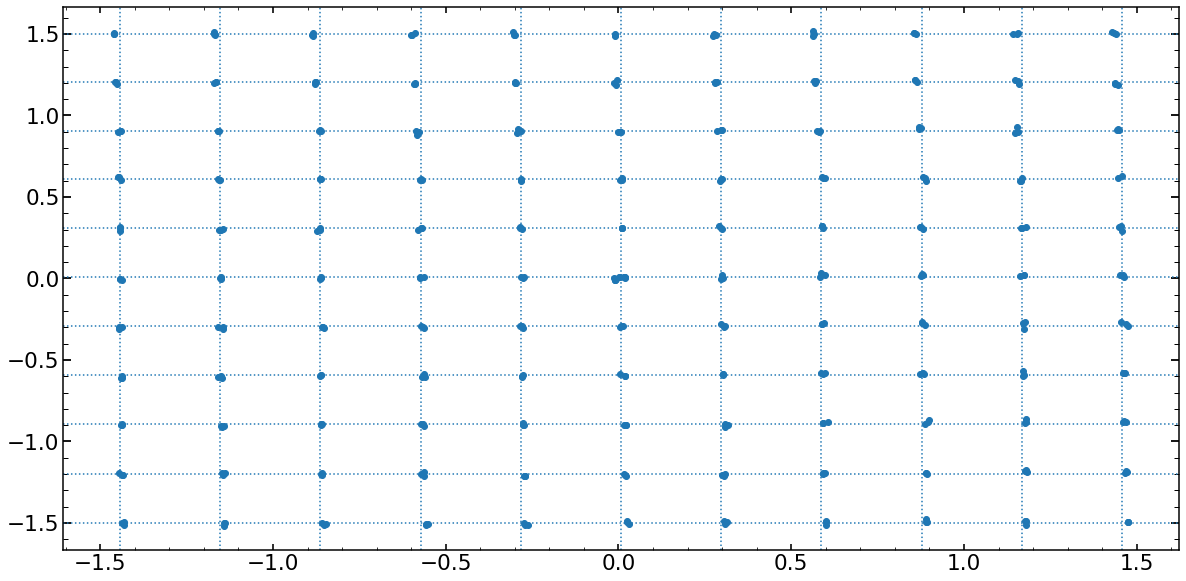

In [94]:
plt.figure(figsize=(20,10))
plt.scatter(array_of_centroid_differences[:,1],array_of_centroid_differences[:,2])
for i in range(len(y_mean_values)):
    plt.axhline(y_mean_values[i],ls=':')
    
for i in range(len(x_mean_values)):
    plt.axvline(x_mean_values[i],ls=':') 

In [95]:
dif_y=[]
for i in [-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05]:
    dif_y.append([i,np.mean(array_of_centroid_differences[(array_of_x_y_z[:,1]<i+0.001) & (array_of_x_y_z[:,1]>(i-0.001))][:,2]),\
    -np.quantile(array_of_centroid_differences[(array_of_x_y_z[:,1]<i+0.001) & (array_of_x_y_z[:,1]>(i-0.001))][:,2],0.25)+\
                 np.quantile(array_of_centroid_differences[(array_of_x_y_z[:,1]<i+0.001) & (array_of_x_y_z[:,1]>(i-0.001))][:,2],0.75)])
    
dif_x=[]
for i in [-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05]:
    dif_x.append([i,np.mean(array_of_centroid_differences[(array_of_x_y_z[:,2]<i+0.001) & (array_of_x_y_z[:,2]>(i-0.001))][:,1]),\
    -np.quantile(array_of_centroid_differences[(array_of_x_y_z[:,2]<i+0.001) & (array_of_x_y_z[:,2]>(i-0.001))][:,1],0.25)+
                 np.quantile(array_of_centroid_differences[(array_of_x_y_z[:,2]<i+0.001) & (array_of_x_y_z[:,2]>(i-0.001))][:,1],0.75)])
    
dif_x=np.array(dif_x)
difx_mean=dif_x[dif_x[:,0]==0][0][1]
dif_x[:,1]=dif_x[:,1]-dif_x[dif_x[:,0]==0][0][1]
#dif_x[:,2]=np.sqrt(dif_x[:,2]**2+dif_x[dif_x[:,0]==0][0][2])

dif_y=np.array(dif_y)
dify_mean=dif_y[dif_y[:,0]==0][0][1]
dif_y[:,1]=dif_y[:,1]-dif_y[dif_y[:,0]==0][0][1]
#dif_y[:,2]=np.sqrt(dif_y[:,2]**2+dif_y[dif_y[:,0]==0][0][2])

In [96]:
difx_mean=dif_x[dif_x[:,0]==0][0][1]
dify_mean=dif_y[dif_y[:,0]==0][0][1]

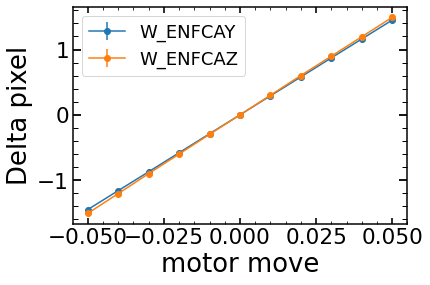

In [97]:
plt.errorbar(dif_x[:,0],dif_x[:,1],yerr=dif_x[:,2],marker='o',label='W_ENFCAY')
plt.errorbar(dif_y[:,0],dif_y[:,1],yerr=dif_y[:,2],marker='o',label= 'W_ENFCAZ')
plt.xlabel('motor move')
plt.ylabel('Delta pixel')
plt.legend()

In [98]:
y_mean_values=[]
for i in range(len(x_unique_positions)):
    y_mean_values.append(np.mean(array_of_centroid_differences[np.array(range(len(array_of_x_y_z)))[array_of_x_y_z[:,1]==x_unique_positions[i]]][:,2]))
    
x_mean_values=[]
for i in range(len(y_unique_positions)):
    x_mean_values.append(np.mean(array_of_centroid_differences[np.array(range(len(array_of_x_y_z)))[array_of_x_y_z[:,2]==y_unique_positions[i]]][:,1]))

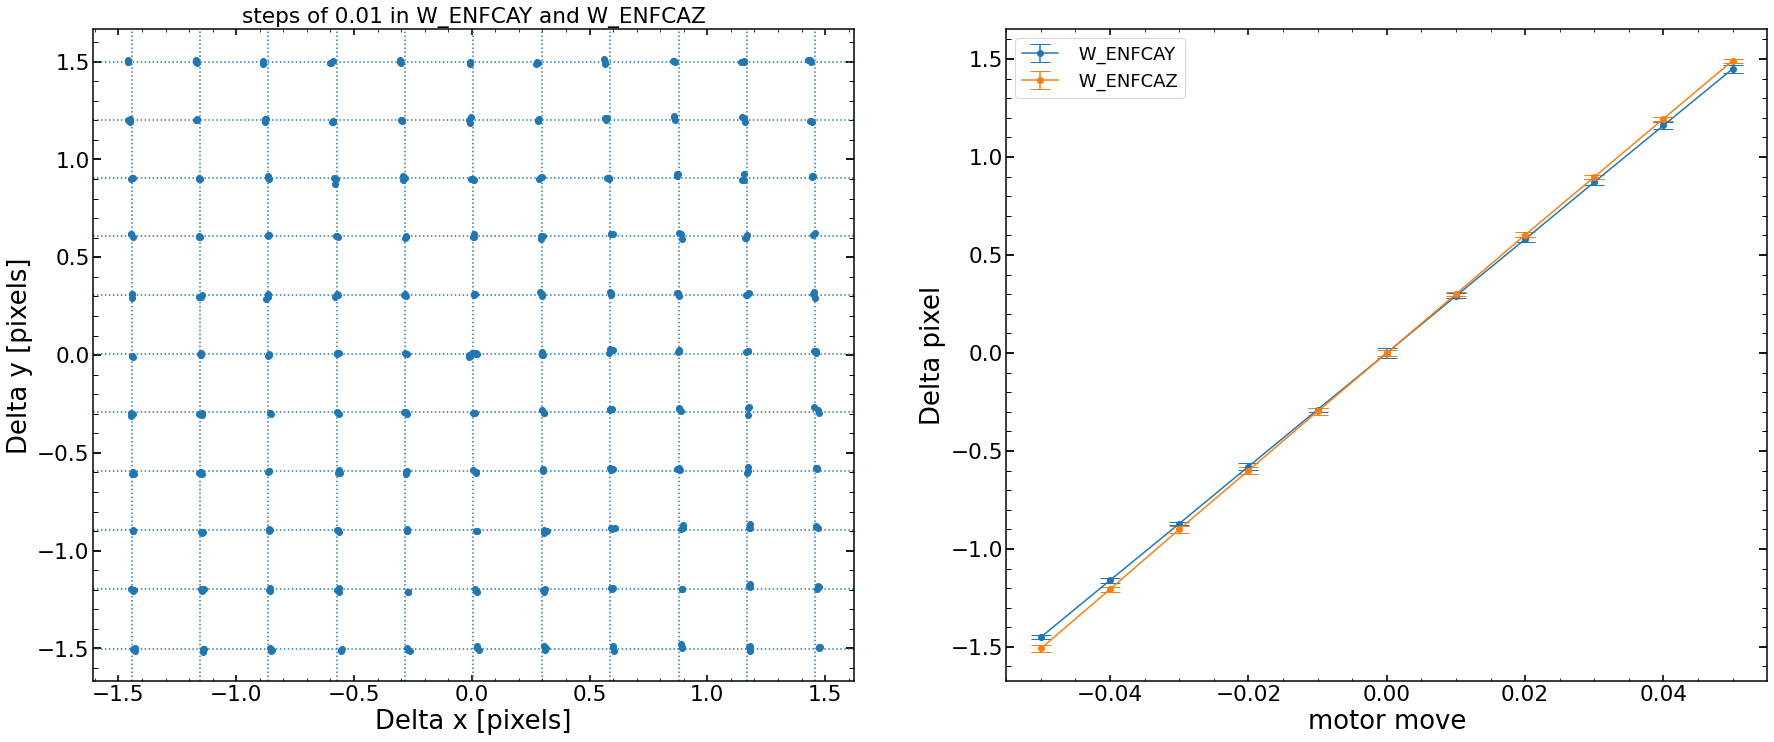

In [104]:
plt.figure(figsize=(30,12))

plt.subplot(121)
plt.title('steps of 0.01 in W_ENFCAY and W_ENFCAZ')
plt.scatter(array_of_centroid_differences[:,1]+dify_mean,array_of_centroid_differences[:,2]+difx_mean)

for i in range(len(y_mean_values)):
    plt.axhline(y_mean_values[i]-dify_mean,ls=':')
    
for i in range(len(x_mean_values)):
    plt.axvline(x_mean_values[i]-difx_mean,ls=':')    
    
    
plt.xlabel('Delta x [pixels]')
plt.ylabel('Delta y [pixels]')


plt.subplot(122)
plt.errorbar(dif_x[:,0],dif_x[:,1],yerr=dif_x[:,2],marker='o',label=' W_ENFCAY',capsize=10)
plt.errorbar(dif_y[:,0],dif_y[:,1],yerr=dif_y[:,2],marker='o',label=' W_ENFCAZ',capsize=10)
plt.xlabel('motor move')
plt.ylabel('Delta pixel')
plt.legend()


In [105]:
np.polyfit(dif_x[:,0],dif_x[:,1],deg=1,w=dif_x[:,2]**2)

array([29.00338619,  0.00022408])

In [103]:
np.polyfit(dif_y[:,0],dif_y[:,1],deg=1,w=dif_y[:,2]**2)

array([30.05374439, -0.00032718])